### Comprehensive Evaluation of Machine Learning Models on Diamond Dataset 

Author: Muhammad Bilal Khan

### Introduction

The primary objective of this notebook is to conduct a thorough evaluation of various machine learning models, both regression and classification, to identify the most accurate algorithm for predicting the target variable. The evaluation will culminate with the application of the best-performing model on a set of dummy data to demonstrate its predictive capabilities.

#### Goals

- To compare a range of machine learning algorithms for both regression and classification tasks.
- To select the top-performing model based on key performance metrics.
- To apply the chosen model to dummy data for prediction validation.

#### Algorithms Evaluated

In my exploration, I will evaluate the following machine learning algorithms:

- **Regression Algorithms:**
  - Linear Regression
  - Support Vector Regression (SVR)
  - Decision Tree Regression
  - Random Forest Regression
  - Gradient Boosting Regression
  - AdaBoost Regression
  - KNN Regression (K-Nearest Neighbors)
  - XGBoost Regression
  - CatBoost Regression
  - LightGBM Regression
  - GaussianNB Regression
  - BernoulliNB Regression 

- **Classification Algorithms:**
  - Logistic Regression
  - Support Vector Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Gradient Boosting Classifier
  - AdaBoost Classifier
  - K-Nearest Neighbors Classifier
  - XGBoost Classifier
  - CatBoost Classifier
  - LightGBM Classifier
  - GaussianNB
  - BernoulliNB


#### Dataset Overview

The dataset under scrutiny is the Diamond Dataset. It provides detailed attributes for each diamond, which are critical in determining its quality and value. The key features included in the dataset are as follows:

- **Carat**: Weight of the diamond measured in carats.
- **Cut**: Quality of the diamond's cut, categorized into grades such as Fair, Good, Very Good, Premium, and Ideal.
- **Color**: Diamond color grade, ranging from D (colorless) to J (slightly tinted).
- **Clarity**: Measure of the diamond's clarity, with categories like IF (Internally Flawless), VVS1/VVS2 (Very Very Slightly Included), VS1/VS2 (Very Slightly Included), SI1/SI2 (Slightly Included), and I1 (Included).
- **Depth**: Total depth percentage calculated as z / mean(x, y) = 2 * z / (x + y).
- **Table**: Width of the diamond's table expressed as a percentage of its average diameter.
- **Price**: Price of the diamond in US dollars.
- **X (Length)**: Length of the diamond in millimeters (mm).
- **Y (Width)**: Width of the diamond in millimeters (mm).
- **Z (Depth)**: Depth of the diamond in millimeters (mm).

These features collectively contribute to a diamond's appearance, quality, and overall market value.

#### Data Preprocessing

Prior to model evaluation, the following preprocessing steps were implemented to ensure data quality and readiness for analysis:

- **Missing Values**: Conducted a comprehensive check for missing values within the dataset.
- **Data Distribution**: Examined the distribution and skewness of the dataset to understand the underlying data structure.
- **Feature Engineering**: Applied appropriate transformations to enhance model performance where necessary.

#### Acknowledgements

This dataset is taken from seaborn library.

In [4]:
# import panda, numpy, matplotlib, seaborn, and sklearn and ignore warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
"""from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier"""
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import pickle


import warnings
warnings.filterwarnings('ignore')

#### Function for Displaying Headings

In [5]:
# Function handler for neat heading display
def heading(title):
    print('-'*50)
    print(title.upper())
    print('-'*50)

#### Load Diamond Dataset

In [6]:
# load diamond dataset with sampling 10k random records
df = sns.load_dataset('diamonds').sample(n=10000, random_state=42)
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


### 1. Data Processing

  #### 1.1. Diamond Dataset Shape Inspection

In [7]:
# Get the shape of the DataFrame, containing the number of rows and columns
df.shape
# Print a heading for the DataFrame information section
heading('Dataframe Information') 
print(f"• Total entries: {df.shape[0]}") 
print(f"• Total columns: {df.shape[1]}")

--------------------------------------------------
DATAFRAME INFORMATION
--------------------------------------------------
• Total entries: 10000
• Total columns: 10


#### 1.2. Dataset Structure

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1388 to 42497
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    10000 non-null  float64 
 1   cut      10000 non-null  category
 2   color    10000 non-null  category
 3   clarity  10000 non-null  category
 4   depth    10000 non-null  float64 
 5   table    10000 non-null  float64 
 6   price    10000 non-null  int64   
 7   x        10000 non-null  float64 
 8   y        10000 non-null  float64 
 9   z        10000 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 655.2 KB


#### 1.3. Succint Data Summary

In [9]:
# Function to print a summary of the DataFrame's column types
def print_data_summary(df):
    # Count the number of categorical columns
    categorical_count = df.select_dtypes(include=['category']).shape[1]
    # Count the number of float columns
    float_count = df.select_dtypes(include=['float64']).shape[1]
    # Count the number of integer columns
    int_count = df.select_dtypes(include=['int64']).shape[1]
    
    # Print the counts in a bullet-point format
    print(f"• Categorical columns: {categorical_count}")
    print(f"• Float columns: {float_count}")
    print(f"• Integer columns: {int_count}")

# Print a heading for the data summary section (assuming 'heading' is a defined function)
heading('Data Summary')
print_data_summary(df)

--------------------------------------------------
DATA SUMMARY
--------------------------------------------------
• Categorical columns: 3
• Float columns: 6
• Integer columns: 1


####  1.4. Diamond Dataset Features

I have changed the Diamond dataset columns x, y and z to x_width, y_width and z_depth for my own clarity.

In [10]:
# Rename 'x', 'y', 'z' columns to 'x_length', 'y_width', 'z_depth' for clarity
df.rename(columns={'x': 'x_length', 'y': 'y_width', 'z': 'z_depth'}, inplace=True)
# Retrieve and store the list of updated column names from the DataFrame
cols = df.columns.tolist()
# Display the updated column names with a heading
heading("Updated Diamond Dataset Columns")
# Iterate and print each column name with a bullet point
for col in cols:
    print("- " + col)


--------------------------------------------------
UPDATED DIAMOND DATASET COLUMNS
--------------------------------------------------
- carat
- cut
- color
- clarity
- depth
- table
- price
- x_length
- y_width
- z_depth


####  1.5. Summary Statistics

In [11]:
df.describe()

,carat,depth,table,price,x_length,y_width,z_depth
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.795464,61.77341,57.447340,3900.356600,5.722033,5.723494,3.534455
std,0.476937,1.45393,2.255054,3992.251932,1.128186,1.120839,0.696424
min,0.200000,43.00000,49.000000,335.000000,0.000000,0.000000,0.000000
25%,0.400000,61.10000,56.000000,929.750000,4.690000,4.700000,2.900000
50%,0.700000,61.90000,57.000000,2385.500000,5.690000,5.700000,3.520000
75%,1.040000,62.50000,59.000000,5235.250000,6.530000,6.530000,4.030000
max,4.010000,79.00000,73.000000,18823.000000,10.140000,10.100000,6.310000


#### 1.5.1. Observation Statistics

In [12]:
# Calculate the descriptive statistics for the DataFrame
stats = df.describe()

# Display a heading for the summary statistics
heading("Summary Statistics")

# Print the summary statistics dynamically using the calculated values
print(f"""
1. The dataset consists of {int(stats.loc['count', 'carat'])} diamond records.
2. Diamond carat weights range from {stats.loc['min', 'carat']} to {stats.loc['max', 'carat']}, with an average of {stats.loc['mean', 'carat']:.2f}.
3. The mean depth percentage is {stats.loc['mean', 'depth']:.2f}%, with a standard deviation of {stats.loc['std', 'depth']:.2f}%.
4. The average table size is {stats.loc['mean', 'table']:.2f}%, varying typically by {stats.loc['std', 'table']:.2f}%.
5. Prices vary widely, from ${stats.loc['min', 'price']:.2f} to ${stats.loc['max', 'price']:.2f}, indicating significant diversity in diamond quality and size.
6. The mean dimensions (length x width x depth) in millimeters are approximately ({stats.loc['mean', 'x_length']:.2f} x {stats.loc['mean', 'y_width']:.2f} x {stats.loc['mean', 'z_depth']:.2f}).
7. The standard deviation in the lengths and widths suggests some variation in diamond shapes and cuts.
8. The 50th percentile (median) values are generally close to the mean, suggesting a relatively symmetrical distribution for carat, depth, and table.
""")

--------------------------------------------------
SUMMARY STATISTICS
--------------------------------------------------

1. The dataset consists of 10000 diamond records.
2. Diamond carat weights range from 0.2 to 4.01, with an average of 0.80.
3. The mean depth percentage is 61.77%, with a standard deviation of 1.45%.
4. The average table size is 57.45%, varying typically by 2.26%.
5. Prices vary widely, from $335.00 to $18823.00, indicating significant diversity in diamond quality and size.
6. The mean dimensions (length x width x depth) in millimeters are approximately (5.72 x 5.72 x 3.53).
7. The standard deviation in the lengths and widths suggests some variation in diamond shapes and cuts.
8. The 50th percentile (median) values are generally close to the mean, suggesting a relatively symmetrical distribution for carat, depth, and table.



### 1.6. Correlation Matrix

#### 1.6.1. Ordinal Categorical Variables and Encoding Methods

Given that all the categorical variables in the diamond dataset are ordinal, it would be more appropriate to use Label Encoding rather than One-Hot Encoding. This is because Label Encoding tends to perform better with ordinal data types.

In [13]:
# Define a function to encode categorical columns using LabelEncoder
def encode_columns(df, cols):
  # Instantiate the LabelEncoder
  le = LabelEncoder()
  
  for col in cols:
    # Apply LabelEncoder to each column and update the DataFrame in place
    df[col] = le.fit_transform(df[[col]])
  # Return the modified DataFrame with encoded columns
  return df

#### 1.6.2. Plotting Correlation Matrix

--------------------------------------------------
CORRELATION MATRIX
--------------------------------------------------


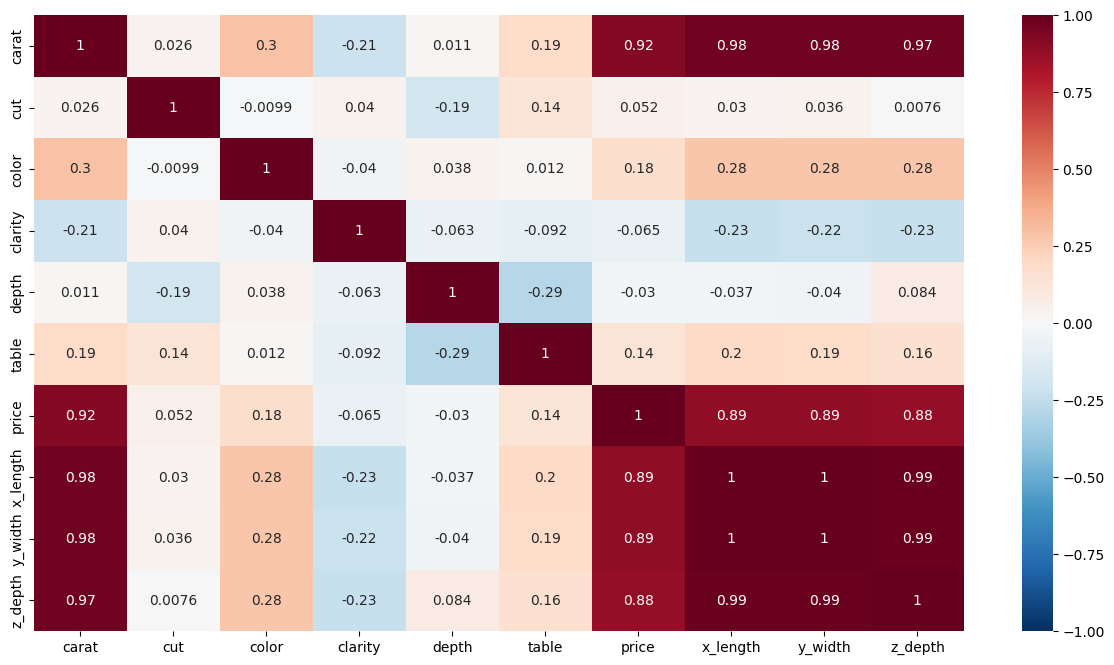

In [14]:
# copy the dataset to a new dataframe for plotting correlation matrix
df_corr = df.copy()
# create a list of categorical features by checking the data type
cat_cols = df_corr.select_dtypes(include=['object', 'category']).columns.tolist()

# Use label encoder to ordinal features
le = LabelEncoder()
df_corr = encode_columns(df_corr, cat_cols)

# plot crr matrix to see the correlation between the variables
heading("Correlation Matrix")
corr = df_corr.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.show()

#### 1.6.3. Correlation Observations in the Diamond Dataset

Upon examination of the correlation matrix for the diamond dataset, there is a notably strong correlation between the price of the diamonds and their carat weight. This strong positive correlation suggests that as the carat weight of a diamond increases, the price typically rises in tandem, indicating that carat weight is a significant predictor of diamond price.

Additionally, the dimensions of the diamond, specifically the length, width, and depth (referred to as 'x_length', 'y_width', and 'z_depth' in the dataset), also show substantial positive correlations with the price. This implies that larger diamonds, as characterized by their measurements, tend to be more expensive.

### 1.7. Missing Values Inspection - Plotting Heatmap

#### 1.7.1. Plotting Heatmap

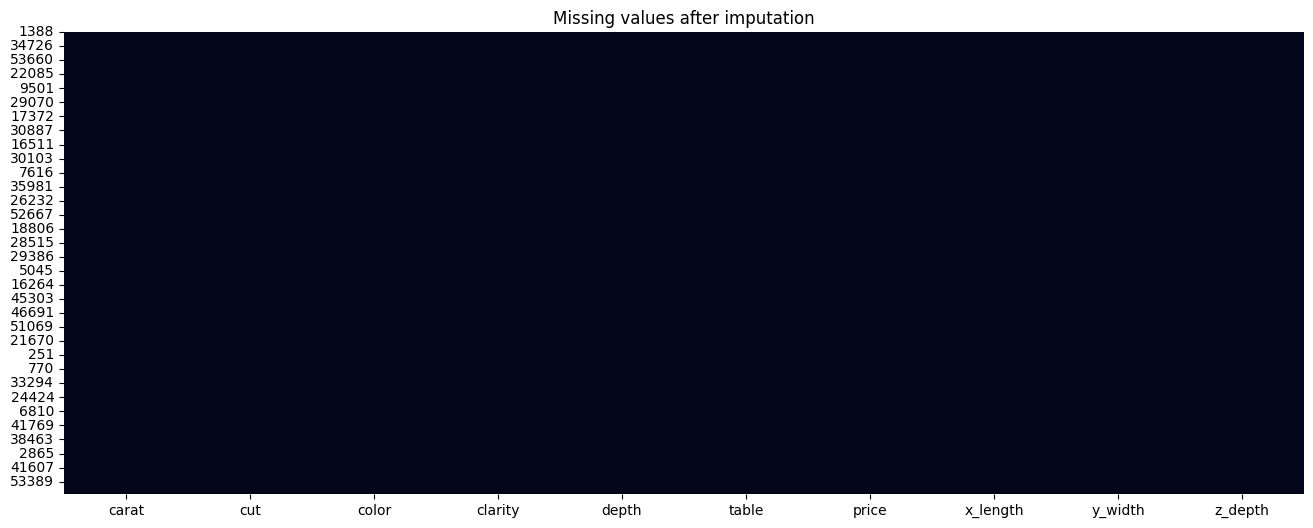

In [15]:
# Plotting heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values after imputation')
plt.show()

#### 1.7.2. Observation - Completeness of the Diamond Dataset

The diamond dataset is fully populated, with no missing values present across all features, ensuring robustness for statistical analysis and machine learning modeling.

### 1.8. Data Distribution Analysis

#### 1.8.1. Visualization of Data Distribution for Numerical Features

In this analysis, I am examining the skewness of of the data across all numerical features.

In [16]:
# Get the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the skewness for each numerical column
skewness = df[numerical_cols].skew()

# Create a DataFrame with skewness values as a single row
skewness_df = pd.DataFrame([skewness], index=['Skewness'])

# Print the skewness DataFrame
heading("Data Distribution - Skewness")
round(skewness_df,3)

--------------------------------------------------
DATA DISTRIBUTION - SKEWNESS
--------------------------------------------------


,carat,depth,table,price,x_length,y_width,z_depth
Skewness,1.143,-0.073,0.771,1.653,0.398,0.393,0.39


#### 1.8.2. Plotting Distribution


The following function generates histograms and boxplots for each numerical column in the dataset to assess the distribution and identify outliers.

In [17]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns 
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#00FFFF"]):
    # Set to "dark" for a black background
    sns.set(style="dark", palette="deep")

    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color=cyan_palette[0])
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#000133')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=2.5,
                    flierprops=dict(markerfacecolor='w', marker='o', markeredgecolor='w', markersize=5),
                    whiskerprops=dict(color='white', linewidth=2.5),
                    capprops=dict(color='white', linewidth=2.5),
                    boxprops=dict(edgecolor='white', linewidth=2.5))
        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#000133')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()


--------------------------------------------------
HISTOGRAM AND BOXPLOT
--------------------------------------------------


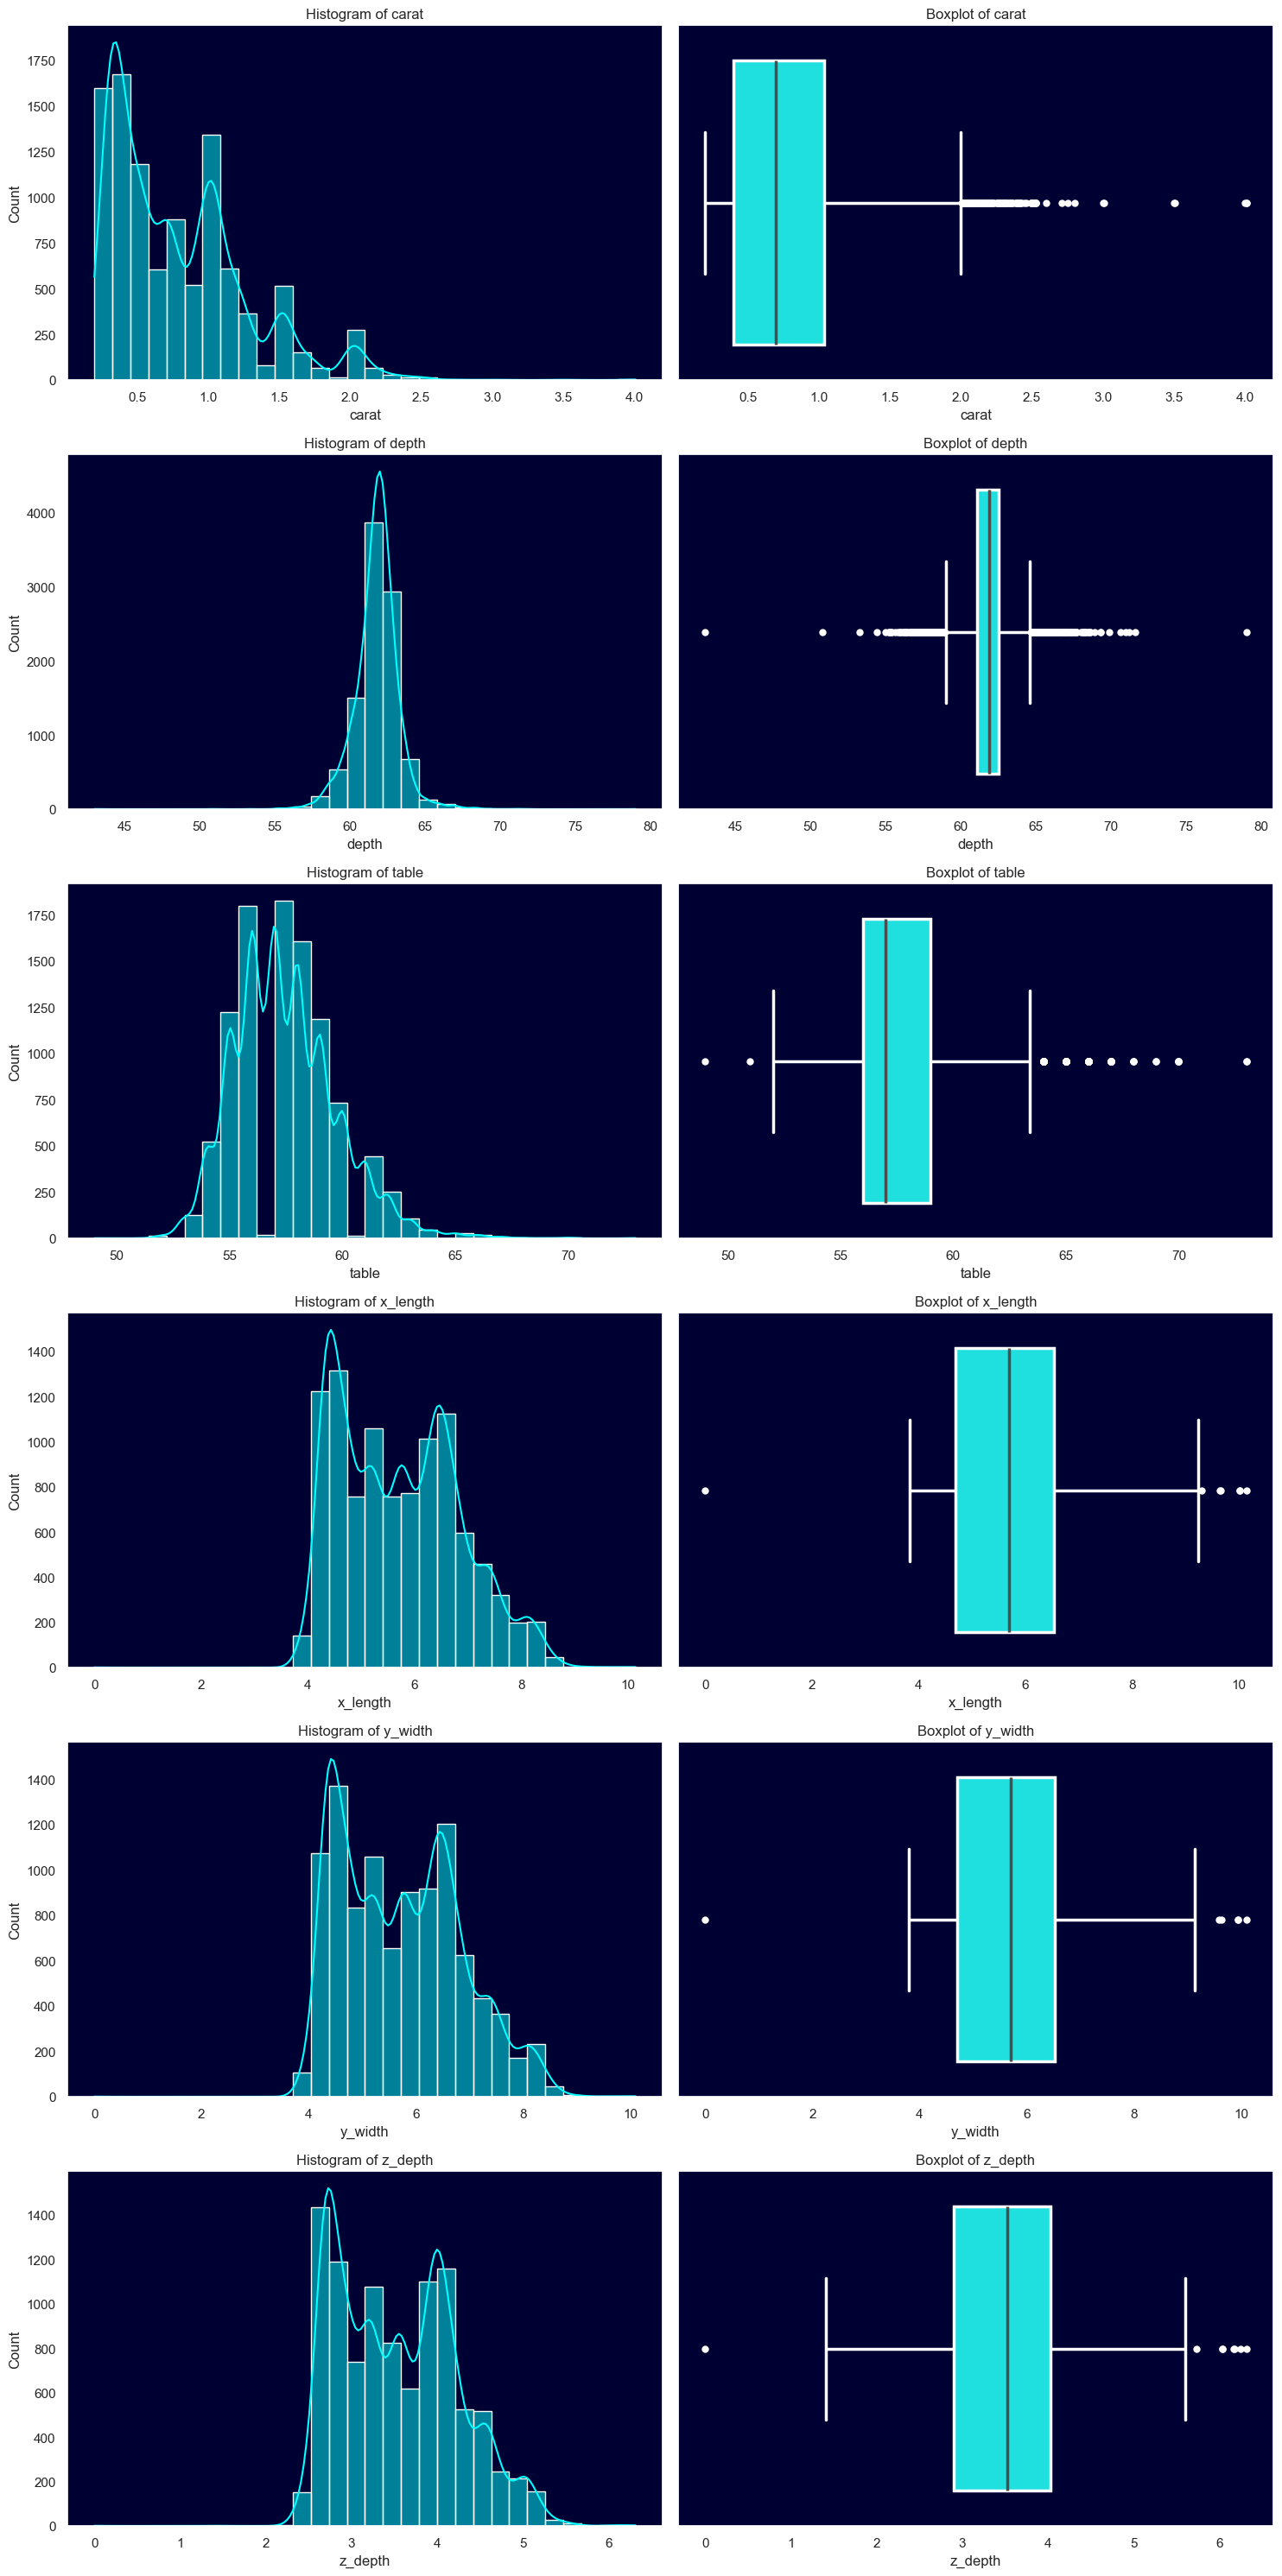

In [18]:
# call the function to plot the histogram and boxplot without the price column
heading("Histogram and Boxplot")
plot_histogram_and_boxplot(df, df[df.columns.difference(['price'])].select_dtypes(include=np.number).columns.tolist())

#### Observations regarding the normal distribution of the numerical features:

- **`Carat`**:
  - Exhibits a positively skewed distribution (**skew = 1.143**), indicating a longer tail on the right side with a mean of 0.795.
  - The majority of diamond carat values are lower than the mean, suggesting a concentration of smaller-sized diamonds in the dataset.

- **`Depth`**:
  - Shows a nearly symmetric distribution (**skew = -0.073**) around the mean of 61.77.
  - The distribution is relatively tight around the mean, as indicated by the low standard deviation of 1.454.

- **`Table`**:
  - Has a positive skew (**skew = 0.771**), indicating a longer tail towards the higher values.
  - The mean table size is 57.45, with most data points falling close to this value.

- **`Price`**:
  - Displays a highly positively skewed distribution (**skew = 1.653**), with most diamonds priced lower than the mean of 3900.36.
  - This suggests that higher-priced diamonds are rarer and deviate from the average diamond price in the dataset.

- **`X_length`**:
  - The distribution has a slight positive skew (**skew = 0.398**), with a mean length of 5.72.
  - A skewness closer to zero indicates that the length of diamonds is somewhat symmetrically distributed.

- **`Y_width`** and **`Z_depth`**:
  - Both have a slight positive skew (**skew = 0.393** and **0.390**, respectively), with means very close to that of X_length, suggesting similar distribution patterns.
  - This slight skewness indicates that while there are outliers, the width and depth measurements tend to be fairly normally distributed around their means.

### 2.0. Comprehensive Model Evaluation Framework

#### 2.1. Regression Model Evaluation Process - My Strategy.

Below is a streamlined approach to evaluate various regression models:

- **Setup**: Initialize a suite of regression models along with their hyperparameters.
- **Scaling**: Apply `QuantileTransformer` to normalize data features.
- **Optimization**: Employ `GridSearchCV` for hyperparameter tuning within cross-validation.
- **Metrics**: Compute MAPE, MAE, and R2 to assess model performance.
- **Selection**: Sort models by name, select the best model based on R2 score.
- **Store Model**: Store model in file.
- **Predictions**: Use dummy data and apply prediction.

##### 2.1.1. Regression Models and Hyperparameters Configuration

In [27]:
from xgboost import XGBRegressor


ModuleNotFoundError: No module named 'xgboost'

In [26]:
# Dictionary of regression models with their respective hyperparameters for grid search
models = {
    'Linear Regression': {
      'model': LinearRegression(),
      'params': {},
      },
    'Support Vector Regression': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          
        },
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3],
        },
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3], 
        },
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3], 
        },
    },
    'AdaBoost Regression': {
        'model': AdaBoostRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
        },
    },
    'KNN Regression': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5],
        },
    },
    'XGBoost Regression': {
        'model': XGBRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3], 
        },
    },
    'CatBoost Regression': {
        'model': CatBoostRegressor(verbose=0),
        'params': {
            'model__iterations': [10, 100],
            'model__depth': [None, 1, 2, 3], 
        },
    },
    'LightGBM Regression': {
        'model': LGBMRegressor(),
        'params': {
            'model__n_estimators': [10],
            'model__max_depth': [None, 1, 2, 3], 
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1],
        },
    },
    'GaussianNB Regression': {
        'model': GaussianNB(),
        'params': {},
    },
    # 'MultinomialNB Regression': {
    #     'model': MultinomialNB(),
    #     'params': {},
    # },
    'BernoulliNB Regression': {
        'model': BernoulliNB(),
        'params': {},
    },
}

NameError: name 'XGBRegressor' is not defined

##### 2.1.2. Data Preparation for Regression Analysis

In [45]:
# Selecting numerical features for regression analysis
# This will filter the DataFrame to include only columns with numerical data types
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Preparing the features and target variables for our regression model
# Dropping the 'price' column from the features since it's the target variable
X = df.drop('price', axis=1)
# The target variable 'price' is what we are trying to predict
y = df['price']

# Encoding categorical columns if present in the features
# 'encode_columns' is a function that converts categorical columns to a numerical format
X = encode_columns(X, cat_cols)

# Splitting the dataset into training and testing sets
# 'train_test_split' is used to divide our data; 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# select numerical features for regoression analysis
num_cols = df.select_dtypes(include=['number']).columns.tolist()

c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### 2.1.3. Performance Evaluation of Regression Models

In [46]:
%%time
# Initialize a list to store model performance metrics
model_scores = []
# Initialize variables to keep track of the best regression model
# Start with the worst possible R2 score
best_r2_score = -float('inf')
best_regressor = None

# Iterate over the configured models
for name, model in models.items():
    # Set up a pipeline with data scaling and the current model
    pipeline = Pipeline([
        ('scaler', QuantileTransformer(random_state=42, output_distribution='normal')),
        ('model', model['model'])
    ])

    # Create a GridSearchCV object to tune model hyperparameters
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model['params'],
        cv=5,  # Number of cross-validation folds
        scoring='neg_mean_absolute_error',  # Scoring metric to optimize
        verbose=0,
        n_jobs=-1  # Use all available cores for parallel processing
    )

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)
    # Predict on the test set using the best found model
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Append performance metrics for the current model to the list
    model_scores.append({
        'Model': name,        
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2,
    })

    # Initialize variables to keep track of the best regression model
    # Check if this model has the best R2 score so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_regressor = grid_search.best_estimator_

# Sort the models based on the Model name (alphabetically)
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
# Convert the sorted model performance list to a DataFrame for display
metrics = pd.DataFrame(sorted_models)
# Identify the best performing model based on the R2 score
best_reg_model = max(sorted_models, key=lambda x: x['R2'])

# Use a custom function 'heading' to display the heading (not defined in this snippet)
heading("Regression Models Performance")
# Display the metrics DataFrame with rounded values for readability
metrics.round(2)

NameError: name 'models' is not defined

##### 2.1.3.1. Observation 
**Best Performer**: **XGBoost Regression** has the highest `R2` score of `0.98`, with a very low `MAPE` of `0.08` and the least `MAE` of `303.18`, indicating highly accurate predictions.

**Worst Performer**: **Linear Regression** shows the lowest `R2` score of `0.73`, with the highest `MAPE` of `0.97` and a high `MAE` of `1584.05`, making it the least accurate in this set.

**Middle Performer**: **KNN Regression** stands in the middle with an `R2` score of `0.93`, a moderate `MAPE` of `0.16`, and an `MAE` of `588.52`, reflecting decent predictive capability compared to others.

##### 2.1.4. Display the best performer 

In [47]:
# Print the best model's performance metrics
heading("BEST REGRESSION MODEL PERFORMANCE")

print(f"Model: {best_reg_model['Model']}")
print(f"MAPE: {best_reg_model['MAPE']:.2f}")
print(f"MAE: {best_reg_model['MAE']:.2f}")
print(f"R2 Score: {best_reg_model['R2']:.2f}")


--------------------------------------------------
BEST REGRESSION MODEL PERFORMANCE
--------------------------------------------------


NameError: name 'best_reg_model' is not defined

##### 2.1.5 Save The Best Performing Model

In [48]:
# Get the best regressor model
best_reg_model = best_regressor.named_steps['model']

# Get the parameters of the best model
best_params = best_model.get_params()

model_with_best_params = XGBRegressor(**best_params)

# Create a new pipeline with the model using the best parameters
new_pipeline = Pipeline([
    ('Scaler', QuantileTransformer(output_distribution="normal", n_quantiles=6400, random_state=42)),
    ('model', model_with_best_params)
])

# Now you can fit the new_pipeline to your training data, for example:
new_pipeline.fit(X_train, y_train)
# Saving the best model to a pickle file
best_model_filename = 'best_regression_model.pkl'
with open(best_model_filename, 'wb') as file:
    pickle.dump(new_pipeline, file)

AttributeError: 'NoneType' object has no attribute 'named_steps'

##### 2.1.6 Load The Best Performer Model

In [49]:
# Load the best model from the pickle file
with open(best_model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

NameError: name 'best_model_filename' is not defined

##### 2.1.6 Diamond Regression Prediction from Dummy Data

In [50]:
# Initialize a dictionary with dummy data for a single diamond
dummy_diamond_data = {
    'carat': [0.23],
    'cut': ['Ideal'],
    'color': ['E'],
    'clarity': ['SI2'],
    'depth': [61.5],
    'table': [55],
    'x_length': [6.95],
    'y_width': [6.98],
    'z_depth': [2.43],
}

# Convert the dictionary to a pandas DataFrame ready for processing
new_X = pd.DataFrame(dummy_diamond_data)
# Apply encoding to categorical columns to prepare for model input
new_X = encode_columns(new_X, cat_cols)
# Use the loaded model to predict the price of the diamond
new_predictions = loaded_model.predict(new_X)

# Custom function 'heading' to display a heading (not defined in this snippet)
heading("Prediction for a Single Diamond")
# Print the predicted price of the diamond
print(f"Predicted price: ${new_predictions[0]:.2f}")


c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ANKIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'loaded_model' is not defined

#### 2.2. Classification Model Evaluation Strategy - My Strategy

Below is a streamlined approach to evaluate various classification models:

- **Setup**: Assemble an array of classification models with initial hyperparameters.
- **Preprocessing**: Use techniques like `Quantile Transformer` for categorical data to ensure proper model input.
- **Optimization**: Apply `GridSearchCV` for fine-tuning hyperparameters with cross-validation.
- **Metrics**: Evaluate model performance using `Accuracy, F1 Score, Precision, and Recall`.
- **Store Mode**: Store model in a file.
- **Prediction**: Load model and test the model's effectiveness with a set of dummy classification data.

##### 2.2.1. Classification Models and Hyperparameters Configuration

In [51]:
# Dictionary of classification models with their respective hyperparameters for grid search
classification_models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'model__C': [0.1],
            'model__max_iter': [1000]
        }
    },
        'Support Vector Classifier': {
        'model': SVC(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'model__C': [0.1, 1, 10],
           
        }
    },
    
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'Random Forest Classifier': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4],
            'model__max_features': ['auto', 'sqrt', 'log2']
        }
    },
     'Gradient Boosting Classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3, 4]
        }
    },
    'AdaBoost Classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'model__n_estimators': [10, 100]
        }
    },
    'K-Nearest Neighbors Classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7]
        }
    },
    'XGBoost Classifier': {
        'model': XGBClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3]
        }
    },
    'CatBoost Classifier': {
        'model': CatBoostClassifier(verbose=0),
        'params': {
            'model__iterations': [10, 100],
            'model__depth': [1, 2, 3, 4]
        }
    },
    'LGBM Classifier': {
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    # 'MultinomialNB': {
    #     'model': MultinomialNB(),
    #     'params': {}
    # },
    'BernoulliNB': {
        'model': BernoulliNB(),
        'params': {}
    },
   
}

NameError: name 'XGBClassifier' is not defined


##### 2.2.2. Data Preparation and Performance Evaluation

In [52]:
# Drop the 'cut' feature from the dataframe to create the features set X
X = df.drop('cut', axis=1)
# Store the 'cut' feature as the target variable y
y = df['cut']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Encode categorical features in the features dataframe
for col in X:
  if X[col].dtype == 'category':
    X[col] = LabelEncoder().fit_transform(X[col])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize a list to store model performance metrics
model_scores = []
best_accuracy = 0
best_estimator = None
# Loop through each classification model
for name, model in classification_models.items():
    # Create a pipeline with data scaling and the model
    pipeline = Pipeline([
        ('Scaler', QuantileTransformer(output_distribution="normal", n_quantiles=6400, random_state=42)),
        ('model', model['model'])
    ])

    # Initialize RandomizedSearchCV with the model's hyperparameter grid
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model['params'],
        cv=5,
        scoring='accuracy',
        verbose=0,
        n_jobs=-1,
        random_state=42
    )
  
    # Fit the RandomizedSearchCV object to the training data
    random_search.fit(X_train, y_train)
    # Predict the target variable for the test set
    y_pred = random_search.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    # Append performance metrics of the current model to the list
    model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })

    if accuracy > best_accuracy:  
        best_accuracy = accuracy
        best_estimator = random_search.best_estimator_

# Sort the models based on their name
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
# Convert sorted model performances to a DataFrame
metrics = pd.DataFrame(sorted_models)

# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

# Custom function to print a heading or replace it with a simple print statement
heading("Classification Models Performance")
metrics.round(2)


NameError: name 'classification_models' is not defined

##### 2.2.1.1 Observation
**Best Performer**: **`LightGBM Classifier`** leads the pack with the highest scores across all metrics, boasting an **`Accuracy`** of **`0.78`**, **`Precision`** of **`0.77`**, **`Recall`** of **`0.78`**, and an **`F1 Score`** of **`0.77`**. This indicates a robust model performance with a strong balance between recall and precision.

**Worst Performer**: **`BernoulliNB`** lags significantly, maintaining its position as the least effective model with the lowest **`Accuracy`** of **`0.51`**, **`Precision`** of **`0.46`**, **`Recall`** of **`0.51`**, and an **`F1 Score`** of **`0.48`**. These metrics suggest that the model is not well-suited for this particular problem.

**Middle Performer**: **`Gradient Boosting Classifier`** and **`XGBoost Classifier`** are tied in the middle, both showing similar and competitive performance metrics. They each achieve an **`Accuracy`** of **`0.76`**, **`Precision`** of **`0.76`** for Gradient Boosting and **`0.76`** for XGBoost, **`Recall`** of **`0.76`**, and an **`F1 Score`** of **`0.76`** for Gradient Boosting and **`0.76`** for XGBoost. These results reflect well-rounded models with a good balance of precision and recall.


##### 2.2.3. Display the best performer 

In [53]:
# Print the best model's performance metrics
heading("BEST CLASSIFICATION MODEL PERFORMANCE")
print(f"Model: {best_clf_model['Model']}")
print(f"Accuracy: {best_clf_model['Accuracy']:.2f}")
print(f"Precision: {best_clf_model['Precision']:.2f}")
print(f"Recall: {best_clf_model['Recall']:.2f}")
print(f"F1 Score: {best_clf_model['F1 Score']:.2f}")


--------------------------------------------------
BEST CLASSIFICATION MODEL PERFORMANCE
--------------------------------------------------


NameError: name 'best_clf_model' is not defined

#### 2.2.4 Train and Save the Best Performing Model

In [54]:
# Extract the best model from the best_estimator
best_model = best_estimator.named_steps['model']

# Get the parameters of the best model
best_params = best_model.get_params()

# Create a new instance of the model with the best parameters
model_with_best_params = LGBMClassifier(**best_params)

# Create a new pipeline with the model using the best parameters
new_pipeline = Pipeline([
    ('Scaler', QuantileTransformer(output_distribution="normal", n_quantiles=6400, random_state=42)),
    ('model', model_with_best_params)
])

# Now you can fit the new_pipeline to your training data, for example:
new_pipeline.fit(X_train, y_train)

# Saving the best model to a pickle file
best_model_file = 'best_classification_model.pkl'
with open(best_model_filename, 'wb') as file:
    pickle.dump(new_pipeline, file)


AttributeError: 'NoneType' object has no attribute 'named_steps'

##### 2.2.4. Load the Best Performing Model

In [55]:
# load best model
loaded_model = pickle.load(open(best_model_file, 'rb'))

NameError: name 'pickle' is not defined

##### 2.2.5 Diamond Classification Prediction from Dummy Data

In [56]:
# Define a dictionary with sample data to classify
classification_dummy_data = {
    'carat': [0.23],
    'color': ['E'],
    'clarity': ['SI2'],
    'depth': [61.5],
    'table': [55],
    'price': [326],
    'x_length': [3.95],
    'y_width': [3.98],
    'z_depth': [2.43],
}

# Convert the dictionary to a pandas DataFrame
new_X = pd.DataFrame(classification_dummy_data)

# Encode categorical or string features in the DataFrame
for col in new_X:
  if new_X[col].dtype == 'category' or new_X[col].dtype == 'object':
    new_X[col] = LabelEncoder().fit_transform(new_X[col])

# Assume loaded_model is a pre-trained classifier loaded from elsewhere
new_predictions = loaded_model.predict(new_X)
# Inverse transform the prediction to the original class label
pred = le.inverse_transform(new_predictions)

# Custom function to print a heading or replace it with a simple print statement
heading("Classification Prediction")
print("The predicted value(s) for the Cut is(are):", pred[0])

NameError: name 'loaded_model' is not defined

### 3.0. Conclusion
Throughout this analysis, we conducted a comprehensive comparison of various regression and classification algorithms. The results clearly indicate that the most effective models are those equipped with optimally tuned hyperparameters. Although my current computational resources limited the extent of hyperparameter tuning, I am satisfied with the performance of the algorithms under the given constraints.

Despite the hardware limitations, the outcomes obtained from the tuning we could perform are promising. It stands to reason that with access to more computational power or enhanced systems, these preliminary results could be significantly improved. The potential for achieving more accurate predictions is evident, and future work with upgraded computational capabilities could unlock the full performance of these machine learning models.

